# 텐서플로우 : Tensorflow (배열)

#### 용어정리

1. Rank : 몇 차원 배열인지를 알려준다. (0차원 : 스칼라, 1차원 : 벡터, 2차원 : 매트릭스, 3차원 : 큐브)


2. Shapes : 각각의 축이 몇개로 구성되었는지 나타낸다.
    - shape[3] : 3개의 벡터로 구성됨
    - shape[2, 3] : 행렬 2 * 3


3. Type : 텐서가 담을 수 있는 데이터의 타입을 의미한다.
    - tf.float32, tf.float64, tf.int32, tf.int64

### 모듈 설치

- pip install tensorflow
- pip install keras

### 설치 버전 확인

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
import keras
keras.__version__

### 텐서 생성

In [ ]:
[1, 2, 3]

In [ ]:
[[1, 2, 3], [4, 5, 6]]

In [ ]:
import numpy as np

arr = np.array([1, 2, 3])

In [ ]:
arr.shape

In [ ]:
tf.constant([1, 2, 3])

In [ ]:
tf.constant(((1, 2, 3), (4, 5, 6)))

In [ ]:
tensor = tf.constant(arr)
tensor

In [ ]:
# 데이터 타입을 정의하면서 텐서 생성

tf.constant([1, 2, 3], dtype=tf.uint8)

In [ ]:
tf.constant([1, 2, 3], dtype=tf.float32)

#### 데이터 타입 변경 : astype()
#### 텐서 데이터 타입 변경 : tf.cast()

In [ ]:
arr_1 = tf.constant([1, 2, 3], dtype=tf.float32)

In [ ]:
arr.astype(np.uint8)

In [ ]:
tensor

In [ ]:
tf.cast(tensor, dtype=tf.uint8)

- 텐서에서 넘파이 호출하기

In [ ]:
tensor.numpy()

In [ ]:
np.array(tensor)

In [ ]:
type(tensor.numpy())

In [ ]:
type(tensor)

- 텐서에서 랜덤함수 사용

In [ ]:
np.random.randn(9)

In [ ]:
tf.random.normal([3, 3])

In [ ]:
tf.random.uniform([4, 4])

# 연산 그래프

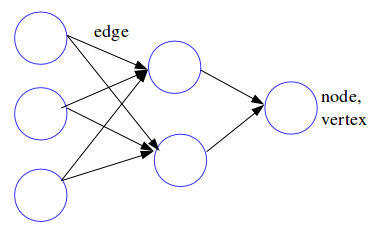

그래프에서 각 노드(뉴런)는 하나의 연산을 나타내며, 입력값을 받아 다른 노드로 전달 할 결과값을 출력한다.

- 동그라미 : 뉴런 또는 노드
- 노드와 노드들은 엣지로 서로 연결되어 있다.
- 입력신호가 왼쪽에서 들어온다.
- 오른쪽으로 출력이 나간다.
- 순전파 <-> 역전파

- 가중치를 찾아가는데에 있어서 순전파는 오른쪽으로, 역전파는 거꾸로(미분)하면서 왼쪽으로

In [ ]:
import tensorflow as tf

- 6개의 노드 생성
    - a = 5 대입
    - b = 2 대입
    - c = 3 대입

In [ ]:
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

In [ ]:
d = tf.multiply(a, b) # a * b
e = tf.add(c, b)      # c + b
f = tf.subtract(d, e) # d - e

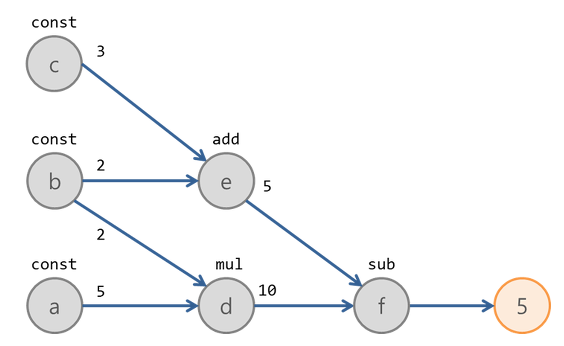

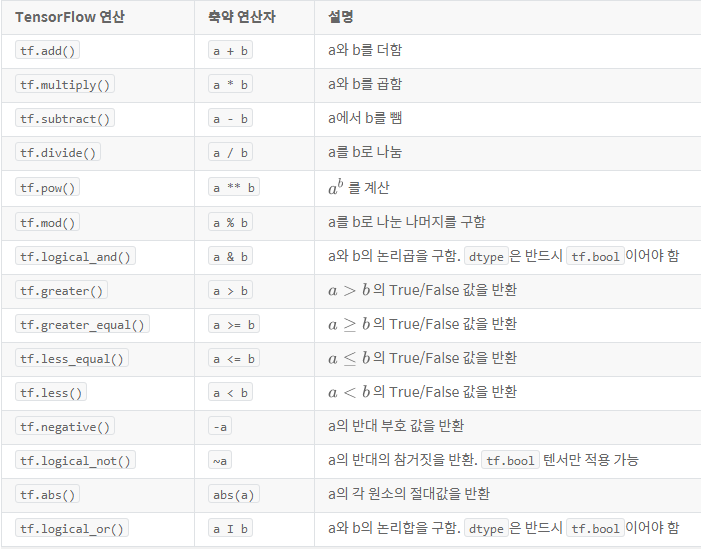

In [ ]:
#from datetime import datetime
#from packaging import version

#import tensorflow as tf
#from tensorflow import keras
import tensorflow as tf

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

d = tf.multiply(a, b) # a * b
e = tf.add(c, b)      # c + b
f = tf.subtract(d, e) # d - e

# 세션 생성 후 연산 그래프 실행
tf.print("연산결과 : ", d)
tf.print("연산결과 : ", e)
tf.print("연산결과 : ", f)

#logdir="logs/calc/" + datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# (2 + 3) * 5

- 연습하자

In [ ]:
%pwd

In [ ]:
cd ../..

In [ ]:
!tensorboard --logdir=./logs/

- 위 명령어는 tensorboard를 실행하는 명령어이다. 끌 때는 ctrl c

- cmd 에서 실행해도 된다.
    - tensorboard --logdir=./logs/

- 웹브라우저에서 localhost:6006

In [ ]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

# Define the model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

(train_images, train_labels), _ = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model.fit(
    train_images,
    train_labels, 
    batch_size=64,
    epochs=5, 
    callbacks=[tensorboard_callback])

# 퍼셉트론은 XOR 연산이 불가능하다

- AND 함수 생성

In [ ]:
import numpy as np

def AND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7         # 임의
    
    tmp = np.sum(w * x) + b
    
    if tmp <= 0 :
        return 0
    else :
        return 1
    
if __name__ == '__main__' :
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)] :
        y = AND(xs[0], xs[1])
        print(str(xs) + ' ----> ' + str(y))

In [ ]:
import numpy as np

def OR(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.4         # 임의
    
    tmp = np.sum(w * x) + b
    
    if tmp <= 0 :
        return 0
    else :
        return 1
    
if __name__ == '__main__' :
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)] :
        y = OR(xs[0], xs[1])
        print(str(xs) + ' ----> ' + str(y))

In [ ]:
import numpy as np

def NAND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7     
    
    tmp = np.sum(w * x) + b
    
    if tmp <= 0 :
        return 0
    else :
        return 1
    
if __name__ == '__main__' :
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)] :
        y = NAND(xs[0], xs[1])
        print(str(xs) + ' ----> ' + str(y))

## 다층퍼셉트론으로 XOR 연산하기

In [ ]:
def XOR(x1, x2) :
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)

    return y

In [ ]:
print('(0, 0) ---> ', XOR(0,0))
print('(0, 1) ---> ', XOR(0,1))
print('(1, 0) ---> ', XOR(1,0))
print('(1, 1) ---> ', XOR(1,1))

In [ ]:
import numpy as np

def XOR(x1, x2) :
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)

    return y
    
if __name__ == '__main__' :
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)] :
        y = XOR(xs[0], xs[1])
        print(str(xs) + ' ----> ' + str(y))

# 활성화 함수

In [ ]:
# step function

import numpy as np
import matplotlib.pyplot as plt

def step(x) :
    return np.array(x>0, dtype=np.int32)

# -5.0 ~ 5.0 까지 0.1 간격으로 그래프 생성
x = np.arange(-5.0, 5.0, 0.1)
y = step(x)

plt.title("Step Function")
plt.plot(x, y)
plt.grid()
plt.show()

In [ ]:
# 시그모이드(sigmoid)

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x) :
    return 1/(1 + np.exp(-x))

# -5.0 ~ 5.0 까지 0.1 간격으로 그래프 생성
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.title("Sigmoid Function")
plt.plot(x, y)
plt.plot([0,0], [1.0, 0.0], ':')
plt.grid()
plt.show()

시그모이드 함수의 단점은 미분을 해서 기울기를 구할 때 발생. (데이터소실)

In [ ]:
# tanh(Hyperbolic Tangent Function : 쌍곡 탄젠트 함수)

import numpy as np
import matplotlib.pyplot as plt

# -5.0 ~ 5.0 까지 0.1 간격으로 그래프 생성
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.title("Tanh Function")
plt.plot(x, y)
plt.plot([0,0], [1.0, -1.0], ':')
plt.axhline(y=0, color='green', linestyle='--')
plt.grid()
plt.show()

In [ ]:
# ReLU (Rectified Linear Unit) : 기본적으로 사용하는 활성화 함수이다. (속도가 빠름)
# x = 0 인 경우 미분이 불가능
# 출력에 최대값이 없어 경사하강법의 문제점을 해결

import numpy as np
import matplotlib.pyplot as plt

def relu(x) :
    return np.maximum(0, x)

# -5.0 ~ 5.0 까지 0.1 간격으로 그래프 생성
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.title("Relu Function")
plt.plot(x, y)
plt.plot([0,0], [1.0, -1.0], ':')
plt.grid()
plt.show()

# 수식 f(x) = max(0, x)

- 웹에 있는 사진 불러오기

In [ ]:
from IPython.display import Image

#Image('https://cdn.pixabay.com/photo/2020/05/29/15/31/lantern-5235537__480.jpg')
Image('/Users/mjkim/Project/python/수업/6일차/5_images.png')

------------

# CNN_MNIST

텐서플로우를 이용하여 CNN을 구현하고, MNIST 손글씨로 학습 및 테스트를 진행한다.

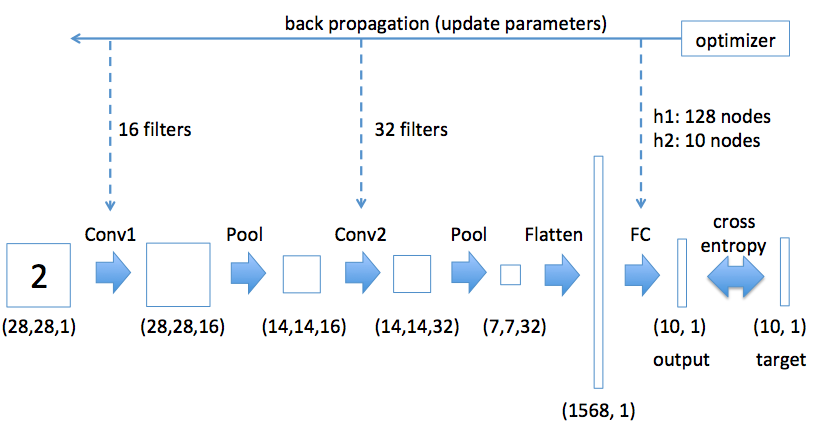

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

tf.random.set_seed(1)

- 데이터 다운로드 후 분리작업

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

- 첫 번째 이미지의 픽셀 값 확인

In [ ]:
x_train[0][5]

- 정답 확인

In [ ]:
y_train[0:9]

- 샘플 이미지 출력

In [ ]:
image = x_train[0]

image.show()

- 테스트용 데이터 확인 : 10000개

In [ ]:
x_test.shape

- 입력레이어에 데이터를 삽입하기 위하여 데이터 구조를 변경한다.

In [ ]:
import numpy as np

x_train = np.reshape(x_train, (60000, 28, 28, 1)) # 흑백 : 1, 컬러 : 3
x_test = np.reshape(x_test, (10000, 28, 28, 1))

In [ ]:
# 변경된 데이터 확인

print(x_train.shape)
print(x_test.shape)

- 데이터 정규화 : 학습시간 단축

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255

x_train /= gray_scale
x_test /= gray_scale

In [ ]:
print(x_train[0])

- 손실함수에서 크로스 엔트로피를 계산하기 위해 실제값은 원 핫 인코딩한다.

In [ ]:
num_classes = 10  # 1 2 3 4 5 6 7 8 9
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_test[0]

# CNN으로 텐서플로우 구현하기

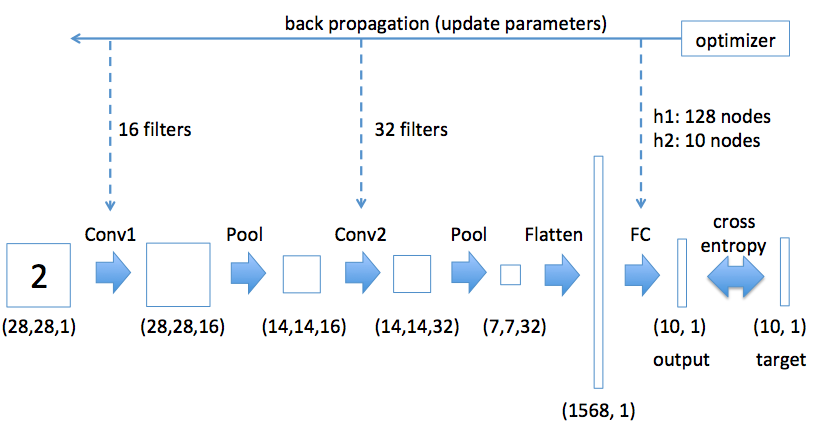

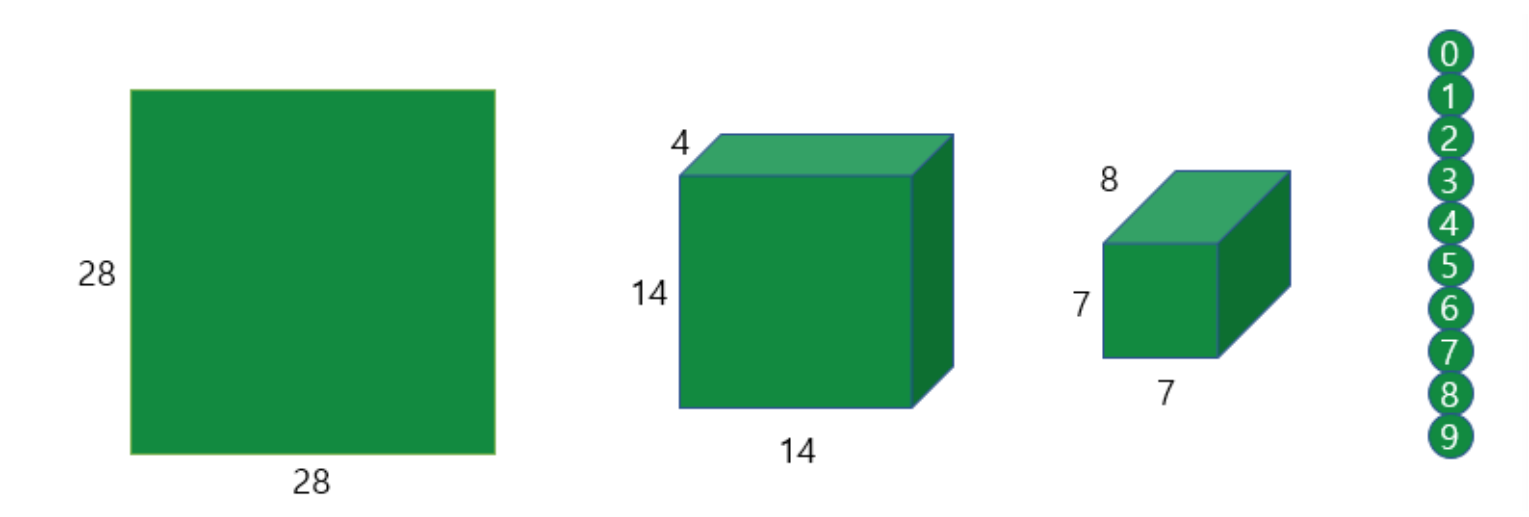

순서대로 

#### input -> conv1 -> conv2 -> FC

1. (28 * 28 * 1)의 이미지에서 conv, relu, maxpool을 거쳐서 -> (14 * 14 * 4)
2. (14 * 14 * 4)의 이미지에서 conv, relu, maxpool을 거쳐서 -> (7 * 7 * 8)
3. (7 * 7 * 8)의 이미지에서 10개를 추출하여 정답과 비교한다.

In [ ]:
model = Sequential()

# 첫번째 레이어에서 총 16개의 필터를 가지고 있고 필터의 크기는 5 * 5이다.
# 편향값은 필터의 개수만큼 만들어준다.
# 활성화 함수로 렐루함수를 사용한다.
model.add(Conv2D(16, kernel_size=(5, 5),
                activation='relu',
                input_shape=(28, 28, 1), padding='same'))

# 파라미터가 줄어들어서 모델 크기가 작아지면 과대적합의 위험이 감소된다. (2 * 2 로 줄인다.)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2계층 레이어에서는 총 32개의 필터를 사용한다.
model.add(Conv2D(32, kernel_size=(5, 5),
                activation='relu',
                padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 차원변경
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

- 크로스엔트로피, 아담 옵티마이저를 사용해 모델 최적화 구축

In [ ]:
model.compile(loss=categorical_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

- 조기종료 선언

In [ ]:
callbacks = [EarlyStopping(monitor='val_accuracy',
                          patience=2,    # 모델개선이 2회 이상 없을 경우
                          restore_best_weights=False),
                          ModelCheckpoint(filepath='best_model.h5', 
                                          monitor='val_accuracy',
                                          save_best_only=True)]

- 학습 시작

In [ ]:
history = model.fit(x_train, y_train, batch_size=500, epochs=5,
                   verbose=1, validation_split=0.1,
                   callbacks=callbacks)

- 테스트 결과 확인

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ", score[0])
print("Test accuracy : ", score[1])

In [ ]:
# 테스트셋의 오차
yVloss = history.history['val_loss']

# 학습셋의 오차
yLoss = history.history['loss']

xLen = np.arange(len(yLoss))


plt.plot(xLen, yVloss, marker='.', c='red', label='testset_loss')
plt.plot(xLen, yLoss, marker='.', c='blue', label='trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 예측 결과 사진 이미지 출력

In [ ]:
import random
import matplotlib.pyplot as plt

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

count = 0

plt.figure(figsize=(12,8))
for n in range(16):
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [ ]:
!tensorboard --logdir=./logs

# openCV

https://opencv.org/

In [ ]:
!pip install opencv-python

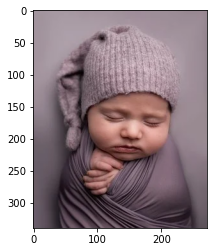

In [26]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/Users/mjkim/Project/python/수업/6일차/openCV/baby2.webp')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
# 파일 저장

import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/Users/mjkim/Project/python/수업/6일차/openCV/baby2.webp')

cv2.imwrite('/Users/mjkim/Project/python/수업/6일차/openCV/new_baby.jpg', image)

True

# 포지티브 & 네거티브

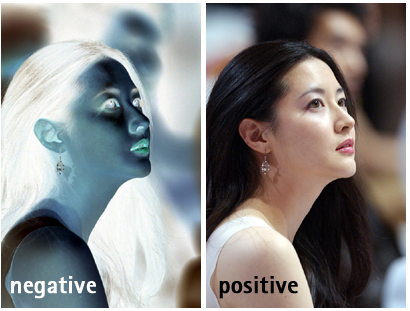

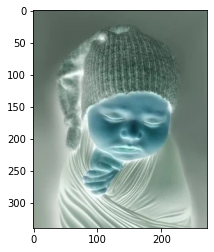

In [28]:
# 이미지 반전하기

import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/Users/mjkim/Project/python/수업/6일차/openCV/new_baby.jpg')

# 이미지 반전 (0 ~ 255)
img = 255 - img # 2
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
import cv2

img = cv2.imread('/Users/mjkim/Project/python/수업/6일차/openCV/new_baby.jpg')

print(img)

[[[158 149 162]
  [158 149 162]
  [158 149 162]
  ...
  [145 135 152]
  [145 135 152]
  [145 135 152]]

 [[158 149 162]
  [158 149 162]
  [158 149 162]
  ...
  [145 135 152]
  [145 135 152]
  [145 135 152]]

 [[158 149 162]
  [158 149 162]
  [158 149 162]
  ...
  [145 135 152]
  [145 135 152]
  [145 135 152]]

 ...

 [[105  93 105]
  [105  93 105]
  [105  93 105]
  ...
  [ 91  83  94]
  [ 91  83  94]
  [ 91  83  94]]

 [[105  93 105]
  [105  93 105]
  [105  93 105]
  ...
  [ 91  83  94]
  [ 91  83  94]
  [ 91  83  94]]

 [[105  93 105]
  [105  93 105]
  [105  93 105]
  ...
  [ 91  83  94]
  [ 91  83  94]
  [ 91  83  94]]]


# 얼굴에 모자이크 처리하기

In [8]:
!ls ./수업/haarcascade_frontalface_alt.xml

ls: ./수업/haarcascade_frontalface_alt.xml: No such file or directory


# 작업 순서

1. 캐스케이드를 이용하여 검출기 생성
2. 이미지 파일을 그레이스케일로 변환
3. 얼굴 검출 실행

In [29]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드를 이용하여 검출기 생성
cascade_file = './수업/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지 파일을 그레이스케일로 변환
img = cv2.imread('/Users/mjkim/Project/python/수업/6일차/openCV/new_baby.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출 실행
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

# 결과 확인
if len(face_list) == 0 :
    print("얼굴 인식 실패")
    quit()
    
# 얼굴인식에 성공한 경우
for (x, y, w, h) in face_list :
    print("얼굴 좌표 : ", x, y, w, h)
    red = (0, 0, 255) # b g r / green = (0, 255, 0)
    cv2.rectangle(img, (x, y), (x + w, y + h), red, thickness=20)
    
# 이미지 출력하기
cv2.imwrite('face_detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.5.4) /Users/runner/work/opencv-python/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


# 모자이크 처리하기

- openCV 에는 모자이크 처리 기능이 없다.
- 픽셀을 강제 확대한 후 강제 축소한다.

In [34]:
#%%writefile mosaic.py
import cv2

def mosaic(img, rect, size) :
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    
    # 축소 & 확대
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    
    # 모자이크 적용
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    
    return img2

Writing mosaic.py


- 모자이크 수동

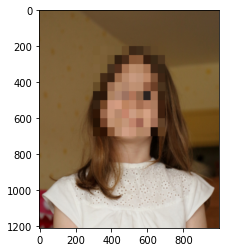

In [31]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/Users/mjkim/Project/python/수업/6일차/openCV/girl.jpg')
mos = mosaic(img, (300, 200, 700, 700), 10)

plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

- 모자이크 함수 합치기

### 주의사항 : 함수는 저장하여 사용한다.

1. 함수 저장위치
    - 첫번째, 현재 작업중인 폴더에 저장한다.
    - 두번째, C:\Users\TJ\AppData\Local\Programs\Python\Python38\Lib

In [29]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드를 이용하여 검출기 생성
cascade_file = './수업/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지 파일을 그레이스케일로 변환
img = cv2.imread('/Users/mjkim/Project/python/수업/6일차/openCV/new_baby.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출 실행
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

# 결과 확인
if len(face_list) == 0 :
    print("얼굴 인식 실패")
    quit()
    
# 얼굴인식에 성공한 경우
for (x, y, w, h) in face_list :
    img = mosaic()
    
# 이미지 출력하기
cv2.imwrite('face_detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.5.4) /Users/runner/work/opencv-python/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'
